## STANDARD BOOTLEG MACRO RESEARCH TEMPLATE
The cell below imports the standard stuff and make a button to bring up the search_symbol_gui. 
With this you can search for asset data and create watchlists. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.available
plt.style.use('seaborn-v0_8')
plt.rcParams["font.family"] = "serif"
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
#%load_ext autoreload
%autoreload 2
plt.rcParams["backend"] = "QtAgg"
plt.rcParams["figure.dpi"] = 350
plt.rcParams["figure.figsize"] = (12, 6)

import os
wd = %pwd
parent = os.path.dirname(wd); grampa = os.path.dirname(parent)
fdel = os.path.sep
import sys
sys.path.append(grampa)

from MacroBackend import Utilities, PriceImporter, Pull_Data, Charting, Fitting
import datetime
import ipywidgets as widgets
from IPython.display import display, HTML, Image, Markdown, clear_output

keys = Utilities.api_keys()

%gui qt
from MacroBackend import search_symbol_gui
# Declare a global variable to hold the UI dictionary
watchlist = None
 
def run_search_symbol_gui(b):
    global watchlist  # Declare the use of the global variable
    print("Running the symbol finder gui... ")
    gui = search_symbol_gui.run_app()
    watchlist = gui  # Update the global variable with the returned ui dictionary

# Step 3: Create a Button widget
button = widgets.Button(description="Search for symbols")
# Step 4: Define an on_click event handler
button.on_click(run_search_symbol_gui)
display(button)

/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend /Users/jamesbishop/Documents/Python/Bootleg_Macro
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/node_modules
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.


Button(description='Search for symbols', style=ButtonStyle())

Running the symbol finder gui... 
Icon path:  /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/app_icon.png <PyQt6.QtGui.QIcon object at 0x13a4e37f0>
Current watchlist set to: EquityIndexes
Selected source: fred
The source value is a function...


qt.qpa.fonts: Populating font family aliases took 213 ms. Replace uses of missing font family "Sans Serif" with one that exists to avoid this cost. 


Current watchlist set to: M3_Monetary_Aggregates2
Current watchlist set to: EquityIndexes
Watchlist data: 
 Empty DataFrame
Columns: []
Index: [] 

Metadata: 
 Empty DataFrame
Columns: []
Index: [name, id, realtime_start, realtime_end, title, observation_start, observation_end, frequency, frequency_short, units, units_short, seasonal_adjustment, seasonal_adjustment_short, last_updated, popularity, group_popularity, notes, source, exchange, shortname, quoteType, index, score, typeDisp, exchDisp, sector, sectorDisp, industry, industryDisp, dispSecIndFlag, isYahooFinance, fullExchange, screener, type, getTA, symbol, path, tier, assets, currencies, resolutions, formats, paramsDomain, line_number, Series Type, Series Start, Series End, No. Obs., Unit, Data Type, Freq., Collection Month, Catalogue, Table, RowNumber, LineNumber, ParentLineNumber, Tier, Path, Datasetname, TableName, ReleaseDate, NextReleaseDate, SearchScore]

[64 rows x 0 columns]
Watchlist saved successfully to: /Users/jamesb

In [3]:
%config InlineBackend

InlineBackend(InlineBackendConfig) options
----------------------------------------
InlineBackend.close_figures=<Bool>
    Close all figures at the end of each cell.
            When True, ensures that each cell starts with no active figures, but it
            also means that one must keep track of references in order to edit or
            redraw figures in subsequent cells. This mode is ideal for the notebook,
            where residual plots from other cells might be surprising.
            When False, one must call figure() to create new figures. This means
            that gcf() and getfigs() can reference figures created in other cells,
            and the active figure can continue to be edited with pylab/pyplot
            methods that reference the current active figure. This mode facilitates
            iterative editing of figures, and behaves most consistently with
            other matplotlib backends, but figure barriers between cells must
            be explicit.
    Cu

In [3]:
watchlist["watchlist"]

title    source
id                                          
VIXCLS  CBOE Volatility Index: VIX      fred
^SPX                 S&P 500 INDEX  yfinance

## Pull data for the watchlist using my DataSet class...

In [4]:
ds1 = Pull_Data.dataset()
ds1.get_data(source = watchlist["watchlist"].iloc[0]["source"], data_code=watchlist["watchlist"].index[0], start_date="1990-01-02")
ds2 = Pull_Data.dataset()
ds2.get_data(source = watchlist["watchlist"].iloc[1]["source"], data_code=watchlist["watchlist"].index[1], start_date="1990-01-02")
ds2.data = pd.Series(ds2.data, index = pd.DatetimeIndex(ds2.data.index))
data = pd.DataFrame(pd.concat([ds1.data, ds2.data], axis=1)).dropna()
data

Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Looking for data from source:  fred data code:  VIXCLS
FRED API response:  200
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Looking for data from source:  yfinance data code:  ^SPX
Trying yfinance package to get historical data for  ^SPX


VIXCLS         ^SPX
1990-01-02   17.24   359.690002
1990-01-03   18.19   358.760010
1990-01-04   19.22   355.670013
1990-01-05   20.11   352.200012
1990-01-08   20.26   353.790009
...            ...          ...
2024-06-21   13.20  5464.620117
2024-06-24   13.33  5447.870117
2024-06-25   12.84  5469.299805
2024-06-26   12.55  5477.899902
2024-06-27   12.24  5482.870117

[8685 rows x 2 columns]

array([<Axes: >, <Axes: >], dtype=object)

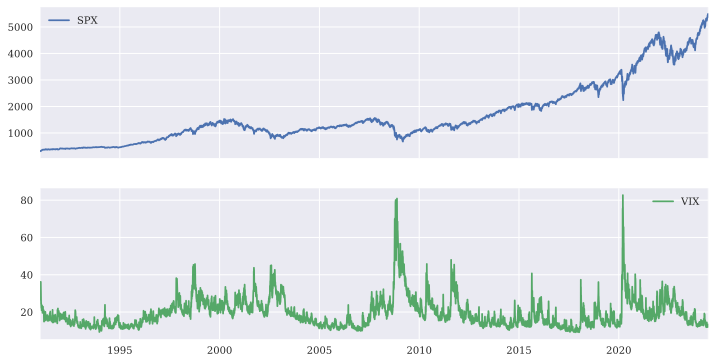

In [18]:
data.rename({data.columns[0]: "VIX", data.columns[1]: "SPX"}, axis = 1, inplace=True)
data = data.resample("D").ffill()
data["ret_VIX"] = np.log(data["VIX"]/data["VIX"].shift(1))
data["ret_SPX"] = np.log(data["SPX"]/data["SPX"].shift(1))
# data["ret_VIX"] = data["VIX"].pct_change()
# data["ret_SPX"] = data["SPX"].pct_change()
data.dropna(inplace=True)
data[["SPX", "VIX"]].plot(subplots=True)

array([<Axes: >, <Axes: >], dtype=object)

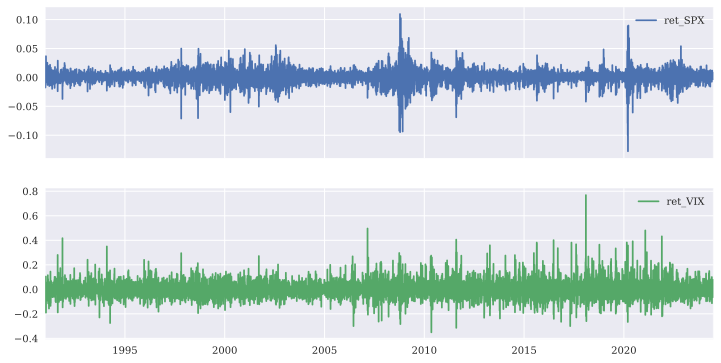

In [19]:
data[["ret_SPX","ret_VIX"]].plot(subplots=True)

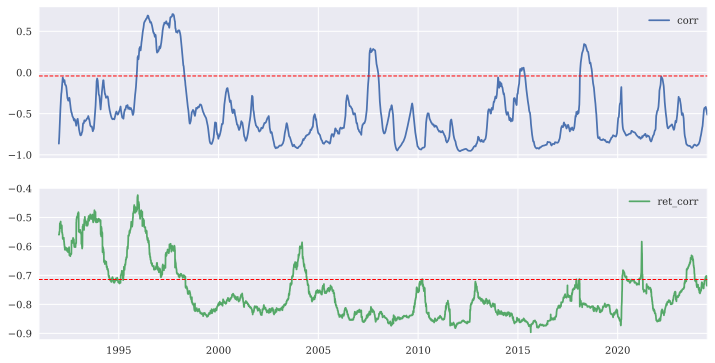

In [20]:
data["corr"] = data["SPX"].rolling(365).corr(data["VIX"]); t_corr = data["SPX"].corr(data["VIX"])
data["ret_corr"] = data["ret_SPX"].rolling(365).corr(data["ret_VIX"]); t_ret_corr = data["ret_SPX"].corr(data["ret_VIX"])
fig = data[["corr", "ret_corr"]].plot(subplots=True)
fig[0].axhline(t_corr, color="r", linestyle="--", lw = 1)
fig[1].axhline(t_ret_corr, color="r", linestyle="--", lw = 1)
# fig.axes[0].axhline(t_corr, color="r", linestyle="--")
# fig.axes[1].axhline(t_ret_corr, color="r", linestyle="--")

In [33]:
pd.plotting.scatter_matrix(data[["ret_SPX", "ret_VIX"]], alpha=0.2, figsize=(6, 6), diagonal='kde')


array([[<Axes: xlabel='ret_SPX', ylabel='ret_SPX'>,
        <Axes: xlabel='ret_VIX', ylabel='ret_SPX'>],
       [<Axes: xlabel='ret_SPX', ylabel='ret_VIX'>,
        <Axes: xlabel='ret_VIX', ylabel='ret_VIX'>]], dtype=object)

In [39]:
ax = data.plot(kind="scatter", x="ret_VIX", y="ret_SPX", alpha=0.2)
reg = np.polyfit(data["ret_VIX"], data["ret_SPX"], 1)
ax.plot(data["ret_VIX"], np.polyval(reg, data["ret_VIX"]), color="r", lw = 1)
ax.text(0.45, 0.95, f"Linear regression: y = {reg[0]:.2f}x + {reg[1]:.2f}", transform=ax.transAxes, fontsize=10)

Text(0.45, 0.95, 'Linear regression: y = -0.12x + 0.00')